In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

import warnings as wr
wr.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data = df.copy()

In [9]:
new_names = ['Age', 'Gender', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholesterol',
             'Fasting Blood Sugar', 'Resting ECG Results', 'Maximum Heart Rate',
             'Exercise Induced Angina', 'ST Depression', 'Slope of ST Segment',
             'Number of Major Vessels', 'Thalassemia Type', 'target']

old_names = data.columns.tolist()
column_name_mapping = {old_name: new_name for old_name, new_name in zip(old_names, new_names)}

data.rename(columns=column_name_mapping, inplace=True)

In [10]:
data.shape

(303, 14)

In [11]:
data.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia Type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
data.describe()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia Type,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Gender                   303 non-null    int64  
 2   Chest Pain Type          303 non-null    int64  
 3   Resting Blood Pressure   303 non-null    int64  
 4   Serum Cholesterol        303 non-null    int64  
 5   Fasting Blood Sugar      303 non-null    int64  
 6   Resting ECG Results      303 non-null    int64  
 7   Maximum Heart Rate       303 non-null    int64  
 8   Exercise Induced Angina  303 non-null    int64  
 9   ST Depression            303 non-null    float64
 10  Slope of ST Segment      303 non-null    int64  
 11  Number of Major Vessels  303 non-null    int64  
 12  Thalassemia Type         303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [14]:
data.isna().sum()

Age                        0
Gender                     0
Chest Pain Type            0
Resting Blood Pressure     0
Serum Cholesterol          0
Fasting Blood Sugar        0
Resting ECG Results        0
Maximum Heart Rate         0
Exercise Induced Angina    0
ST Depression              0
Slope of ST Segment        0
Number of Major Vessels    0
Thalassemia Type           0
target                     0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

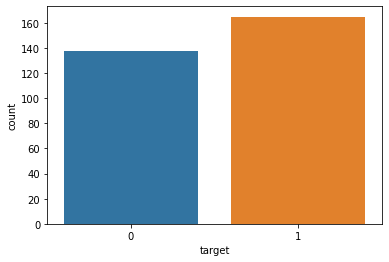

In [15]:
data['target'].value_counts()
sns.countplot(data.target)

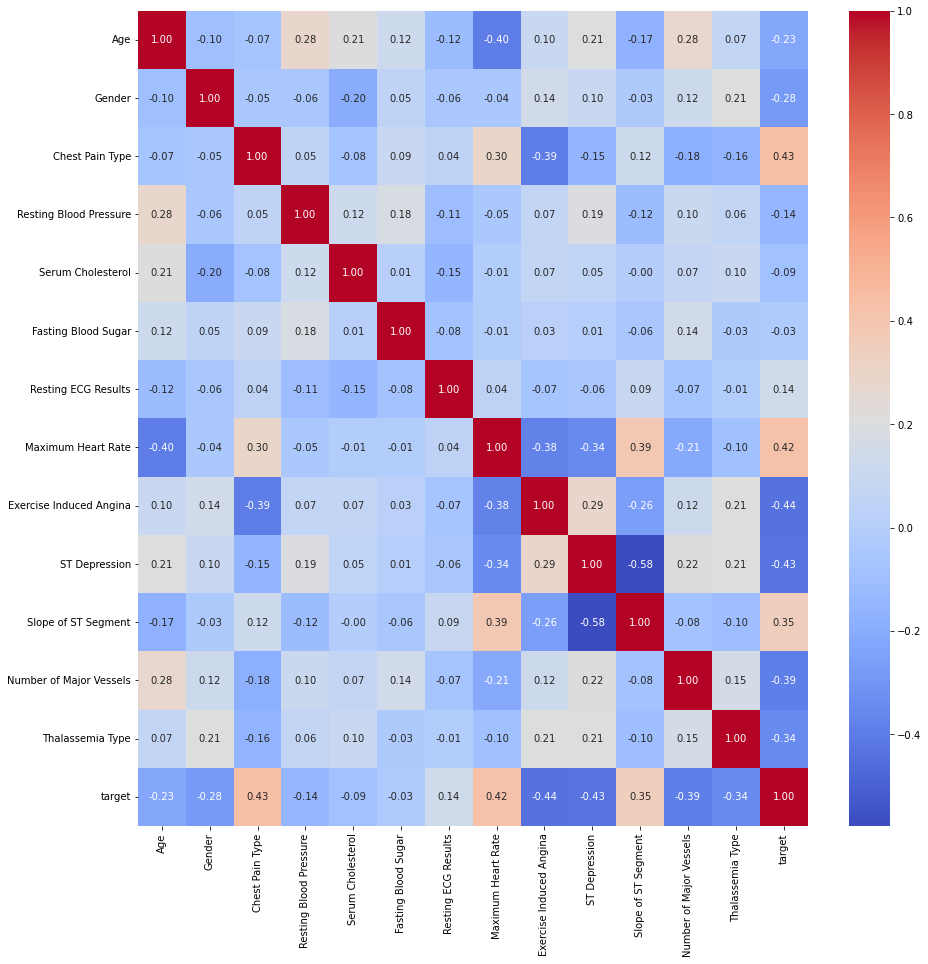

In [16]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [17]:
target_correlations = corr_matrix['target'].abs().sort_values(ascending=False)
print("\nCorrelations with target variable:")
print(target_correlations)


Correlations with target variable:
target                     1.000000
Exercise Induced Angina    0.436757
Chest Pain Type            0.433798
ST Depression              0.430696
Maximum Heart Rate         0.421741
Number of Major Vessels    0.391724
Slope of ST Segment        0.345877
Thalassemia Type           0.344029
Gender                     0.280937
Age                        0.225439
Resting Blood Pressure     0.144931
Resting ECG Results        0.137230
Serum Cholesterol          0.085239
Fasting Blood Sugar        0.028046
Name: target, dtype: float64


In [18]:
data.drop(['Fasting Blood Sugar', 'Serum Cholesterol', 'Resting Blood Pressure', 'Resting ECG Results'], axis='columns')

,Age,Gender,Chest Pain Type,Maximum Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia Type,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


In [19]:
# Numerical variables
numerical_cols = ['Age', 'Resting Blood Pressure', 'Serum Cholesterol', 
                  'Maximum Heart Rate', 'ST Depression']

# Categorical variables (including those stored as integers)
categorical_cols = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 
                    'Resting ECG Results', 'Exercise Induced Angina', 
                    'Slope of ST Segment', 'Number of Major Vessels', 
                    'Thalassemia Type', 'target']

# Create separate dataframes
numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

print("Numerical columns:")
print(numerical_data)
print("\nCategorical columns:")
print(categorical_data)

Numerical columns:
     Age  Resting Blood Pressure  Serum Cholesterol  Maximum Heart Rate  \
0     63                     145                233                 150   
1     37                     130                250                 187   
2     41                     130                204                 172   
3     56                     120                236                 178   
4     57                     120                354                 163   
..   ...                     ...                ...                 ...   
298   57                     140                241                 123   
299   45                     110                264                 132   
300   68                     144                193                 141   
301   57                     130                131                 115   
302   57                     130                236                 174   

     ST Depression  
0              2.3  
1              3.5  
2              1.

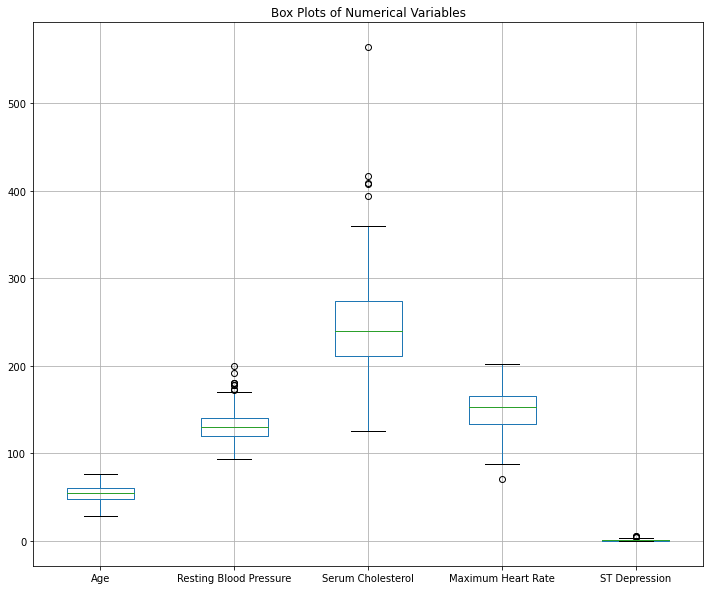


Outliers
Age: 0 outliers
Resting Blood Pressure: 9 outliers
Serum Cholesterol: 5 outliers
Maximum Heart Rate: 1 outliers
ST Depression: 5 outliers


In [20]:
# Box plot
plt.figure(figsize=(12, 10))
numerical_data.boxplot()
plt.title('Box Plots of Numerical Variables')
plt.show()

# Calculate IQR and identify outliers
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutliers")
for column in numerical_cols:
    outliers = numerical_data[(numerical_data[column] < lower_bound[column]) | 
                              (numerical_data[column] > upper_bound[column])]
    print(f"{column}: {len(outliers)} outliers")

In [21]:
scaler = StandardScaler()
scaled_data_standard = pd.DataFrame(scaler.fit_transform(numerical_data), 
                                    columns=numerical_cols)


# Compare original and scaled data
print("Original Data:")
print(numerical_data.describe())
print("\nStandard Scaled Data:")
print(scaled_data_standard.describe())


Original Data:
              Age  Resting Blood Pressure  Serum Cholesterol  \
count  303.000000              303.000000         303.000000   
mean    54.366337              131.623762         246.264026   
std      9.082101               17.538143          51.830751   
min     29.000000               94.000000         126.000000   
25%     47.500000              120.000000         211.000000   
50%     55.000000              130.000000         240.000000   
75%     61.000000              140.000000         274.500000   
max     77.000000              200.000000         564.000000   

       Maximum Heart Rate  ST Depression  
count          303.000000     303.000000  
mean           149.646865       1.039604  
std             22.905161       1.161075  
min             71.000000       0.000000  
25%            133.500000       0.000000  
50%            153.000000       0.800000  
75%            166.000000       1.600000  
max            202.000000       6.200000  

Standard Scaled Data

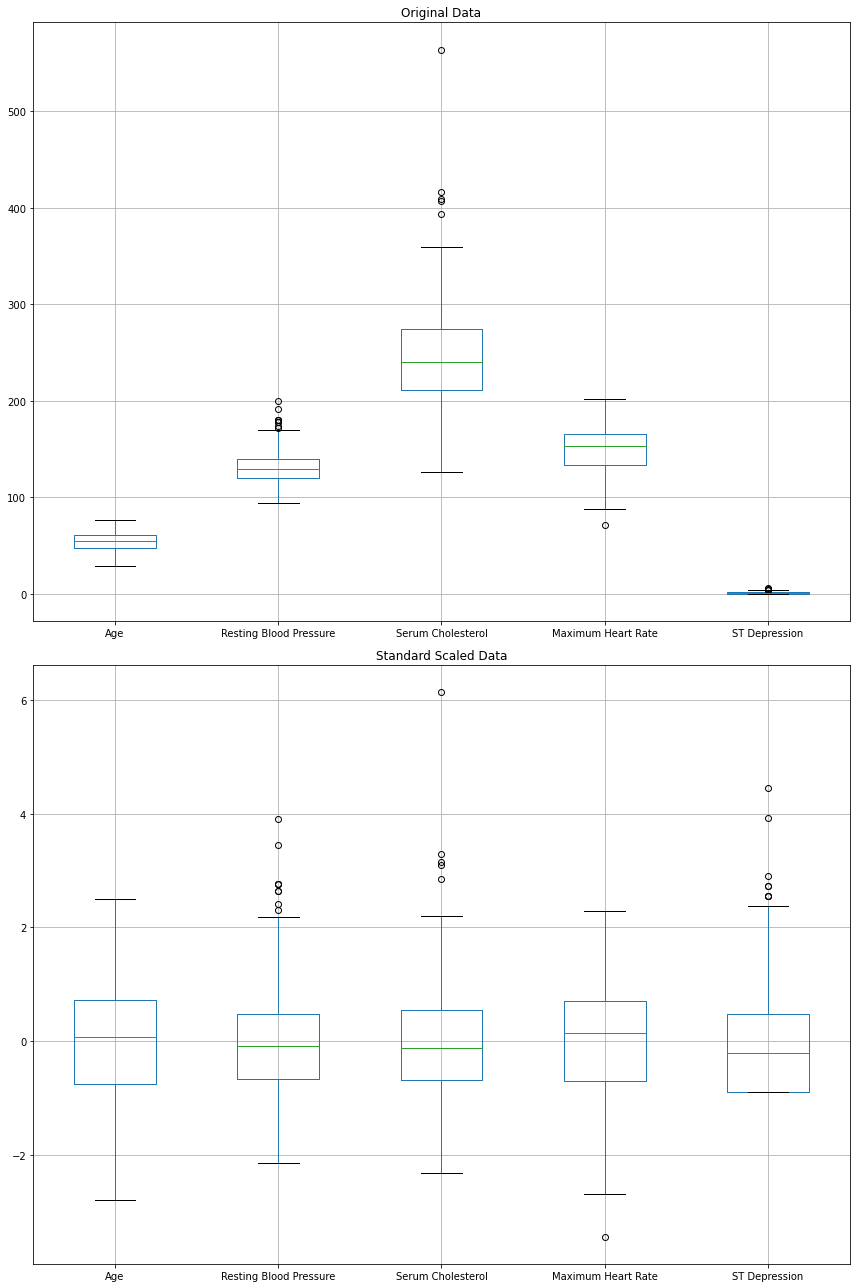

In [22]:
# Visualize the effect of scaling
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

numerical_data.boxplot(ax=ax1)
ax1.set_title('Original Data')

scaled_data_standard.boxplot(ax=ax2)
ax2.set_title('Standard Scaled Data')

plt.tight_layout()
plt.show()

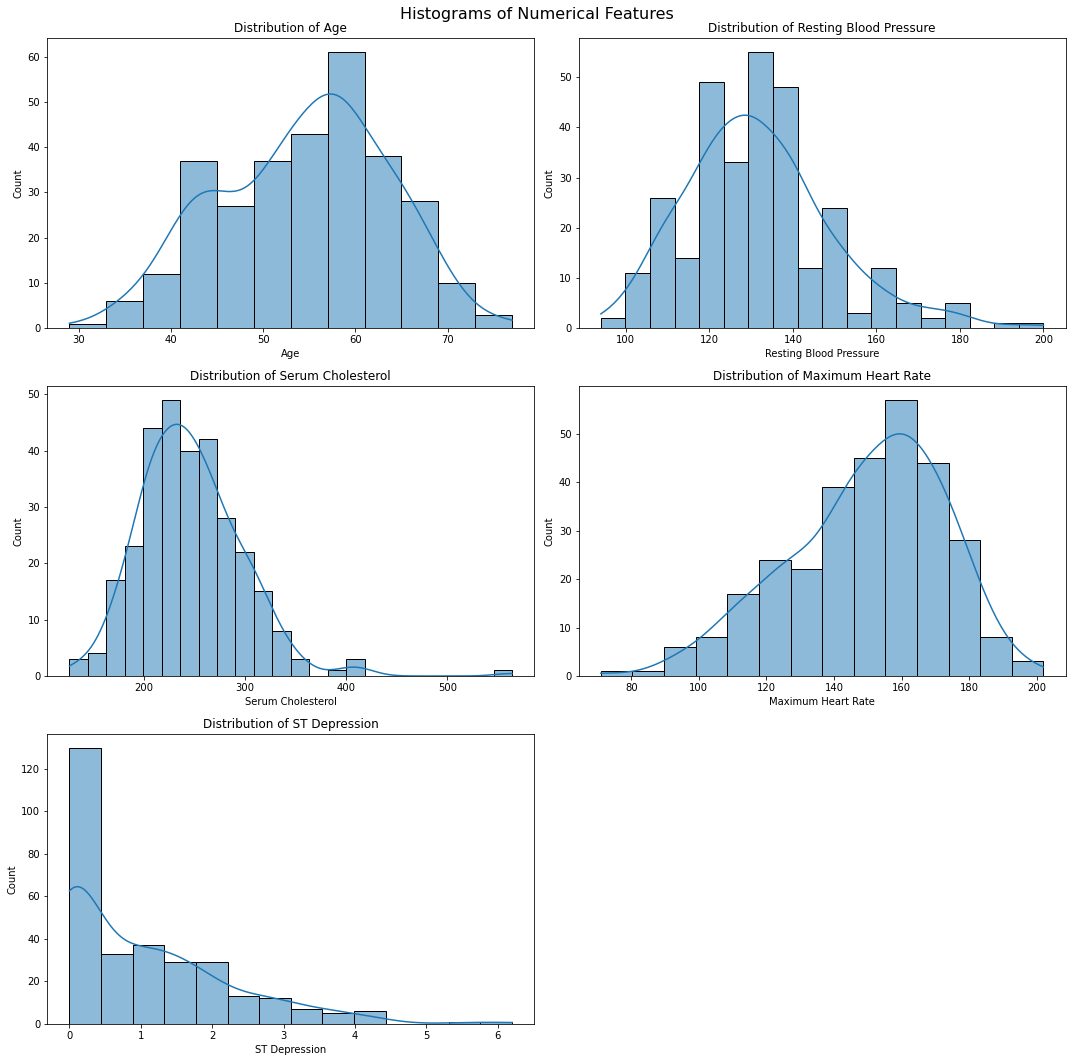

In [23]:
# Numerical variables
numerical_cols = [col for col in ['Age', 'Resting Blood Pressure', 'Serum Cholesterol', 
                  'Maximum Heart Rate', 'ST Depression'] if col in data.columns]

# Plot histograms for numerical variables
if numerical_cols:
    fig, axes = plt.subplots(nrows=(len(numerical_cols) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(numerical_cols) + 1) // 2)))
    fig.suptitle('Histograms of Numerical Features', fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data=data, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found matching the specified names.")

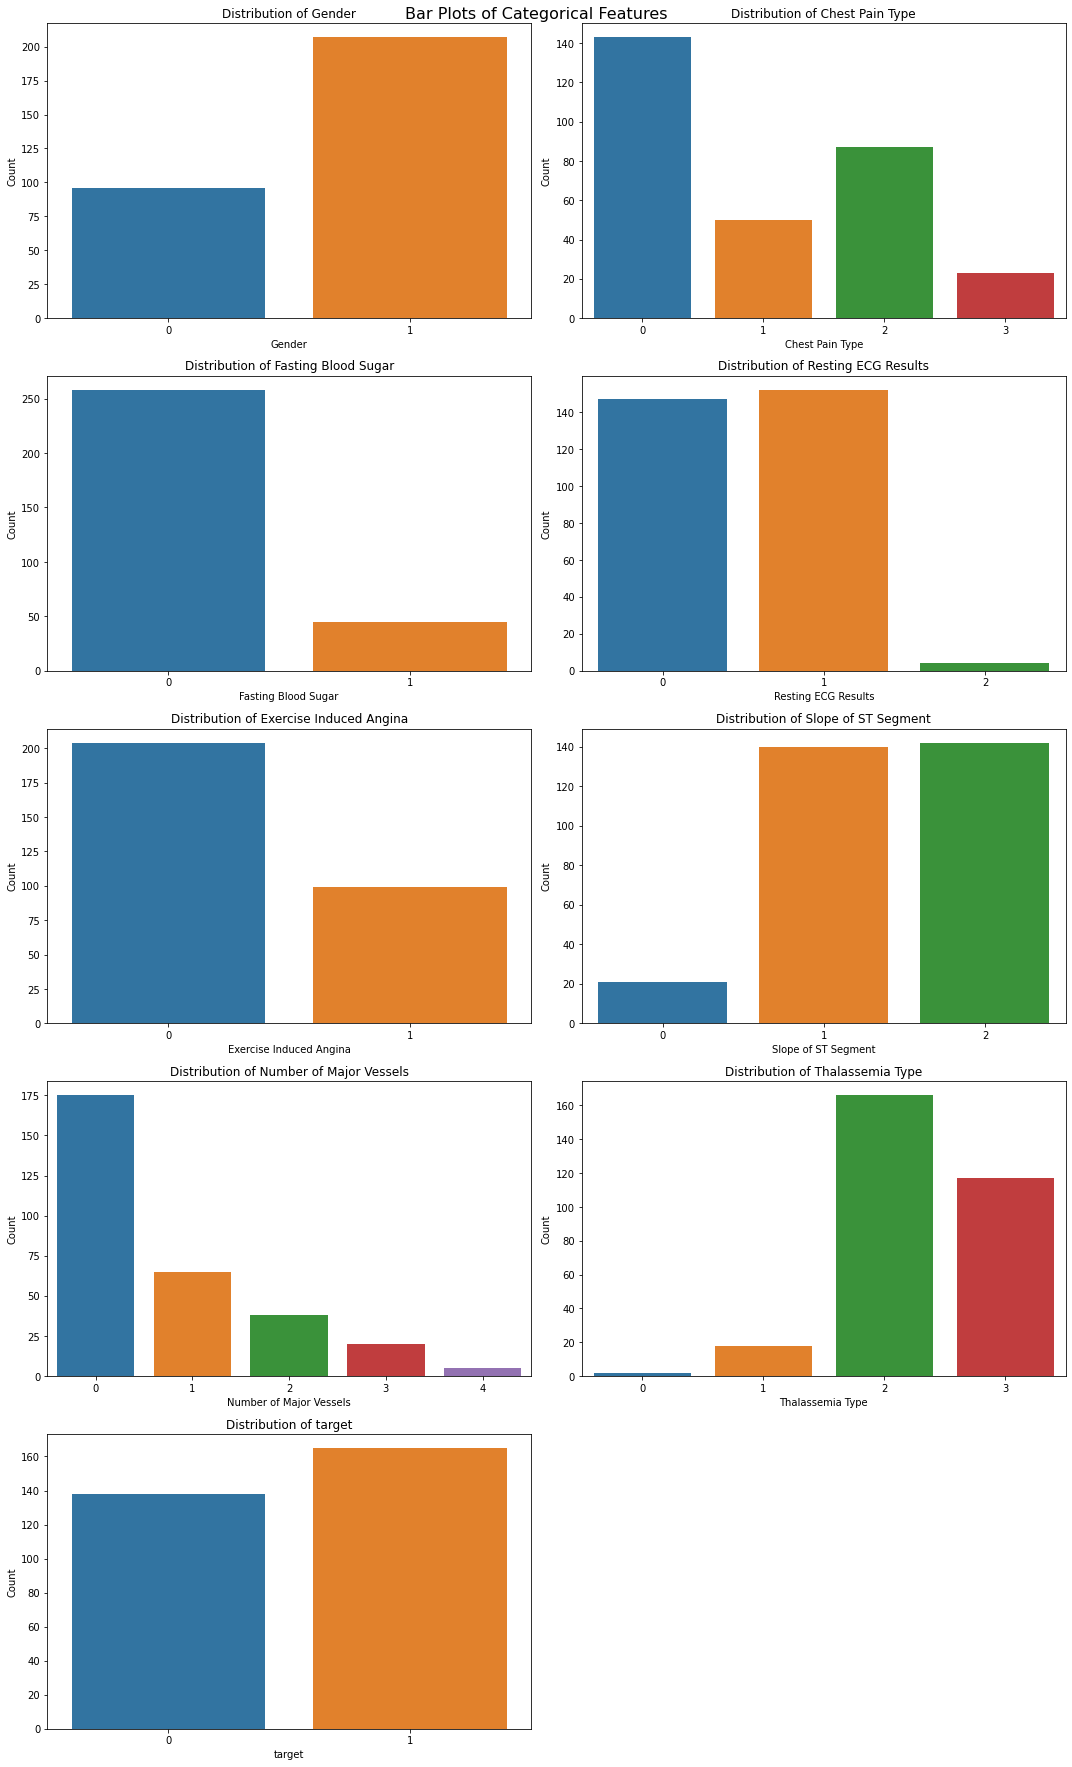

In [24]:
# Categorical variables (update these names to match your DataFrame)
categorical_cols = [col for col in ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 
                    'Resting ECG Results', 'Exercise Induced Angina', 
                    'Slope of ST Segment', 'Number of Major Vessels', 
                    'Thalassemia Type', 'target'] if col in data.columns]

# Plot bar plots for categorical variables
if categorical_cols:
    fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(categorical_cols) + 1) // 2)))
    fig.suptitle('Bar Plots of Categorical Features', fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        if data[col].nunique() > 5:
            axes[i].tick_params(axis='x', rotation=45)

    for i in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found matching the specified names.")

In [25]:
# Assess feature importance using a random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf, prefit=False)
selector.fit(data.drop('target', axis=1), data['target'])

selected_features = data.drop('target', axis=1).columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Age', 'Chest Pain Type', 'Maximum Heart Rate', 'ST Depression',
       'Number of Major Vessels', 'Thalassemia Type'],
      dtype='object')


In [42]:
X = data[selected_features]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Lists to store results
model_names = []
accuracies = []
auc_scores = []

# List of models to train
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
]

# Define features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
for name, model in models:
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store results
    model_names.append(name)
    accuracies.append(accuracy)
    auc_scores.append(auc)


Training Random Forest...
Accuracy: 0.8361
AUC: 0.9203

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Training SVM...
Accuracy: 0.7049
AUC: 0.8394

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61


Training Logistic Regression...
Accuracy: 0.8852
AUC: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
 

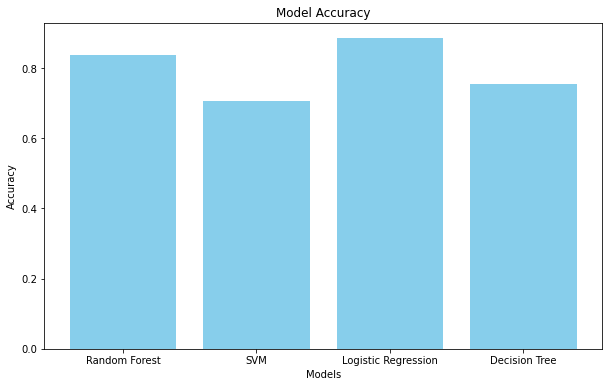

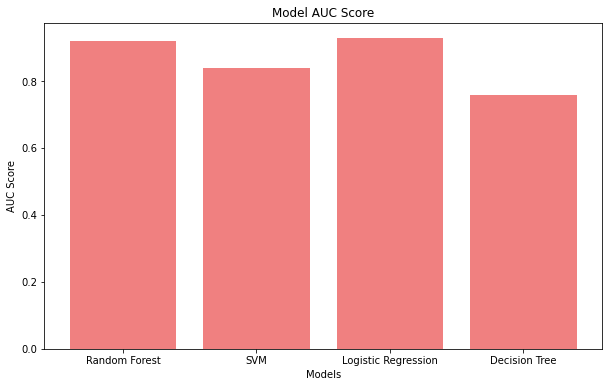


Best model based on AUC: Logistic Regression


In [48]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Plot AUC
plt.figure(figsize=(10, 6))
plt.bar(model_names, auc_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model AUC Score')
plt.show()

# Find the best model based on AUC
best_model = max(models, key=lambda x: roc_auc_score(y_test, x[1].predict_proba(X_test)[:, 1]))
print(f"\nBest model based on AUC: {best_model[0]}")

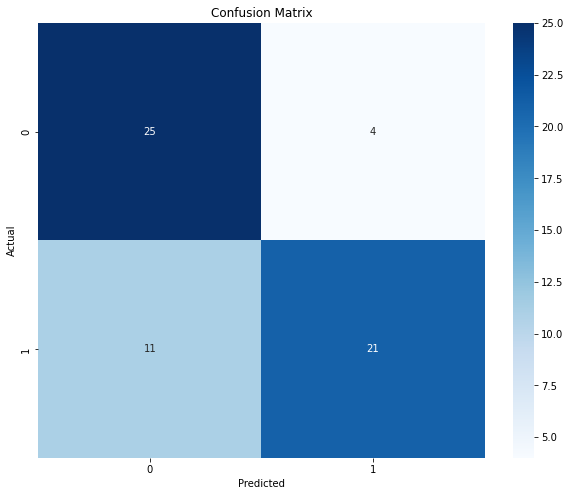

In [49]:
# Confusion Matrix plot
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_

# Define other models with default parameters
svm_model = SVC(probability=True, random_state=42)
logreg_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()

# List of models to train
models = [
    ("Random Forest", best_rf),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Decision Tree", best_dt)
]

In [52]:
# Lists to store results
model_names = []
accuracies = []
auc_scores = []

# Train and evaluate each model
for name, model in models:
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store results
    model_names.append(name)
    accuracies.append(accuracy)
    auc_scores.append(auc)



Training Random Forest...
Accuracy: 0.8689
AUC: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Training SVM...
Accuracy: 0.7049
AUC: 0.8394

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61


Training Logistic Regression...
Accuracy: 0.8852
AUC: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
 

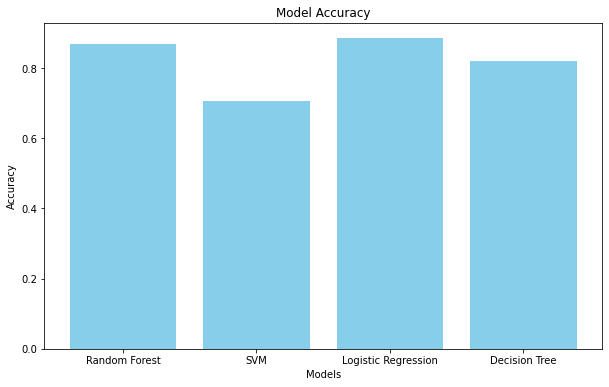

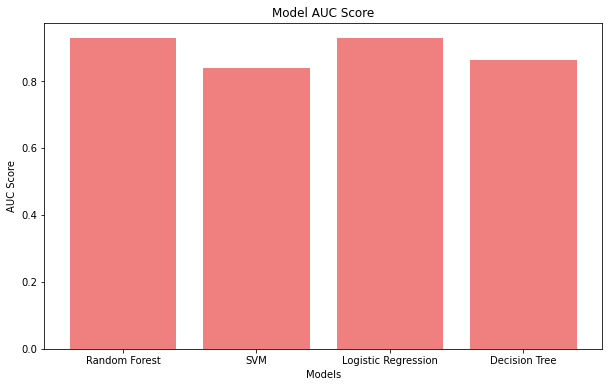

In [59]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Plot AUC
plt.figure(figsize=(10, 6))
plt.bar(model_names, auc_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model AUC Score')
plt.show()

In [60]:
import joblib

# Save the model
joblib.dump(best_model[1], 'best_model.pkl')

['best_model.pkl']